# Importing Libraries

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
rcParams['axes.labelpad'] = 20 
rcParams['axes.titlesize'] = 20
rcParams['axes.titlepad'] = 20 
rcParams['figure.figsize'] = 22, 10
rcParams["legend.loc"] = 'upper right'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Input and Exploration

In [3]:
chunk = pd.read_csv(
  '/content/drive/MyDrive/Skripsi_Jawa-NTT/Hasil CSV/Klorofil-a/Klorofil-a 1998 - 2020.csv',
  parse_dates=['Date'],
  chunksize=10000,
  dtype=float
)
df = pd.concat(chunk)

In [4]:
dates = pd.to_datetime(df['Date'])

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('Date')

In [ ]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41154,41155,41156,41157,41158,41159,41160,41161,41162,41163
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,1.110740,1.071616,1.034067,1.181048,1.133111,0.805908,0.620042,0.570913,0.566927,0.331302,...,0.129524,0.130246,0.132039,0.131244,0.127961,0.125937,0.116502,0.122466,0.128744,0.111842
1998-01-02,1.113268,1.073341,1.035046,1.181577,1.133452,0.806074,0.620134,0.570970,0.566970,0.331327,...,0.129519,0.138284,0.132037,0.131246,0.127968,0.125947,0.123879,0.122486,0.121143,0.119053


In [ ]:
df.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,41154,41155,41156,41157,41158,41159,41160,41161,41162,41163
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-30,0.163495,0.155833,0.158637,0.152889,0.179467,0.172925,0.179229,0.186269,0.194630,0.199971,...,0.123165,0.125729,0.128973,0.124458,0.121011,0.119595,0.121104,0.124386,0.124974,0.128435
2020-12-31,0.151081,0.154483,0.168978,0.163657,0.168546,0.174581,0.194306,0.189414,0.198732,0.218319,...,0.098661,0.101605,0.104233,0.107388,0.109444,0.112785,0.117605,0.121885,0.125360,0.129977


In [ ]:
df.shape

(8392, 41164)

# Preprocessing

##Data Splitting

In [22]:
train_size = int(len(df) - 731)
test_size = 745
train, test = df.iloc[:train_size], df.iloc[-test_size:]
print(len(train), len(test))

7661 745


In [23]:
dates_test = dates.iloc[int(len(df)-731):]
dates_test = np.array(dates_test)

In [ ]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41154,41155,41156,41157,41158,41159,41160,41161,41162,41163
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,1.110740,1.071616,1.034067,1.181048,1.133111,0.805908,0.620042,0.570913,0.566927,0.331302,...,0.129524,0.130246,0.132039,0.131244,0.127961,0.125937,0.116502,0.122466,0.128744,0.111842
1998-01-02,1.113268,1.073341,1.035046,1.181577,1.133452,0.806074,0.620134,0.570970,0.566970,0.331327,...,0.129519,0.138284,0.132037,0.131246,0.127968,0.125947,0.123879,0.122486,0.121143,0.119053


In [ ]:
train.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,41154,41155,41156,41157,41158,41159,41160,41161,41162,41163
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-30,0.128129,0.132610,0.138790,0.149003,0.163345,0.178888,0.197697,0.217980,0.240813,0.335403,...,0.097474,0.097196,0.097074,0.103903,0.097261,0.097594,0.103111,0.096917,0.091146,0.099127
2018-12-31,0.125664,0.129875,0.135652,0.145094,0.161346,0.176346,0.194930,0.214782,0.235802,0.327141,...,0.098240,0.097966,0.097817,0.097518,0.097877,0.098104,0.096605,0.097337,0.097943,0.099138


In [ ]:
test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41154,41155,41156,41157,41158,41159,41160,41161,41162,41163
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-18,0.137485,0.138944,0.138028,0.142218,0.170689,0.223573,0.199775,0.203811,0.185920,0.324816,...,0.111721,0.110194,0.108353,0.10824,0.106549,0.109359,0.110435,0.113780,0.115104,0.116194
2018-12-19,0.128678,0.130518,0.137560,0.143507,0.149552,0.196613,0.191300,0.201112,0.195712,0.309192,...,0.111289,0.109667,0.107728,0.10739,0.105402,0.108226,0.109331,0.113021,0.113263,0.113166


In [ ]:
test.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,41154,41155,41156,41157,41158,41159,41160,41161,41162,41163
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-30,0.163495,0.155833,0.158637,0.152889,0.179467,0.172925,0.179229,0.186269,0.194630,0.199971,...,0.123165,0.125729,0.128973,0.124458,0.121011,0.119595,0.121104,0.124386,0.124974,0.128435
2020-12-31,0.151081,0.154483,0.168978,0.163657,0.168546,0.174581,0.194306,0.189414,0.198732,0.218319,...,0.098661,0.101605,0.104233,0.107388,0.109444,0.112785,0.117605,0.121885,0.125360,0.129977


##Normalizing The Data

In [24]:
def scale_data(train,test):
  max_chl = df.values.max()
  min_chl = df.values.min()
  train_scaled = (train - min_chl)/(max_chl - min_chl)
  test_scaled = (test - min_chl)/(max_chl - min_chl)
  return train_scaled, test_scaled

In [25]:
train_scaled, test_scaled = scale_data(np.array(train),np.array(test))

In [26]:
train_scaled.shape

(7661, 41164)

In [27]:
test_scaled.shape

(745, 41164)

##Create Dataset

In [28]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)        
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [30]:
time_steps = 14

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train_scaled[:,:251], train_scaled[:,:251], time_steps)
X_test, y_test = create_dataset(test_scaled[:,:251], test_scaled[:,:251], time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7647, 14, 251) (7647, 251)
(731, 14, 251) (731, 251)


In [31]:
def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# LSTM Model Training

In [32]:
def create_model(X_train, y_train, neuron,neuron1,split):
  model = keras.Sequential()
  model.add(
      keras.layers.LSTM(
        units=neuron,
        activation='relu',
        input_shape=(X_train.shape[1], 251),
        return_sequences=True
      )
    )
  model.add(
      keras.layers.LSTM(
          units=neuron1,
          activation='relu',
          return_sequences=False
      )
  )
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(units=251))
  model.compile(optimizer='adam', loss=root_mean_squared_error)
  
  history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=split,
    verbose=0,
    shuffle=False)

  return model,history

## Model 1 (90, 10 Split - 512 x 256 Neurons)

In [33]:
model1, history1 = create_model(X_train[:,:,:251].reshape(7647,14,251),
                                y_train[:,:251].reshape(7647,251),
                                512,256, 0.1)

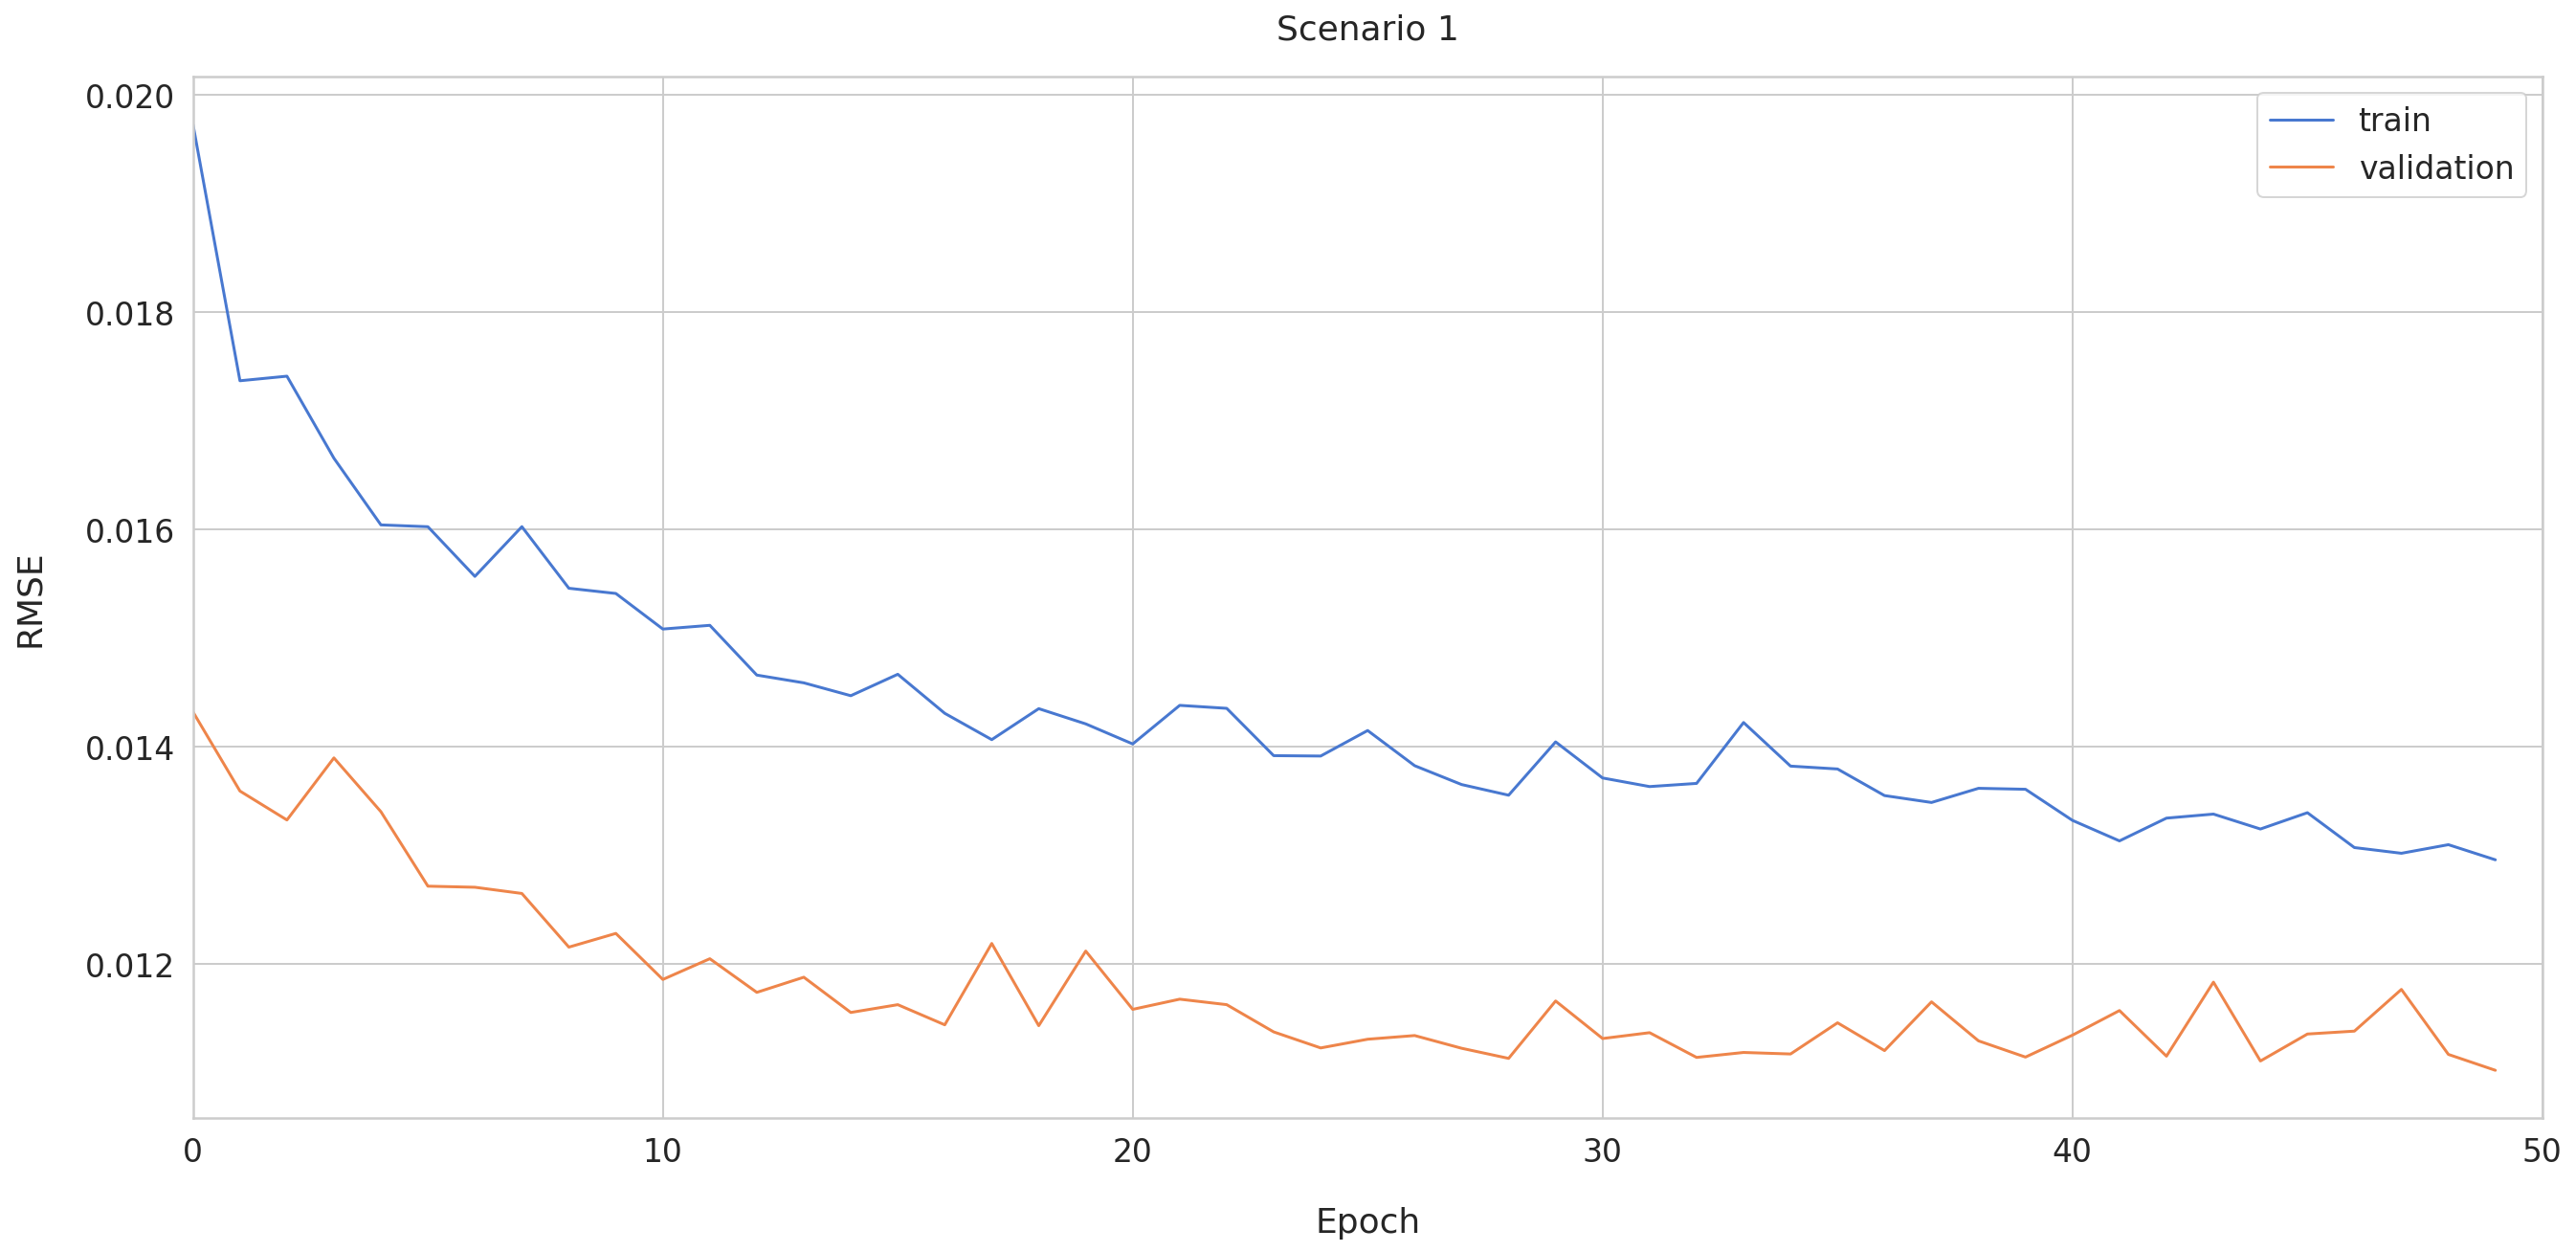

<Figure size 1584x720 with 0 Axes>

In [34]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='validation')
plt.xlim(0,50)
plt.title('Scenario 1')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./Graphs/Models/Model 1.jpg')
plt.show()
plt.clf()

In [35]:
train_loss = pd.DataFrame()
train_loss.insert(0,'Epochs',range(1,51))
train_loss['Model 1'] = history1.history['loss']
train_loss.head(2)

,Epochs,Model 1
0,1,0.019730
1,2,0.017369


In [36]:
val_loss = pd.DataFrame()
val_loss.insert(0,'Epochs',range(1,51))
val_loss['Model 1'] = history1.history['val_loss']
val_loss.head(2)

,Epochs,Model 1
0,1,0.014320
1,2,0.013591


In [37]:
model1.save("./Model/Model 1.h5")

## Model 2 (90, 10 Split - 512 x 512 Neurons)

In [38]:
model2, history2 = create_model(X_train[:,:,:251].reshape(7647,14,251),
                                y_train[:,:251].reshape(7647,251),
                                512, 512, 0.1)

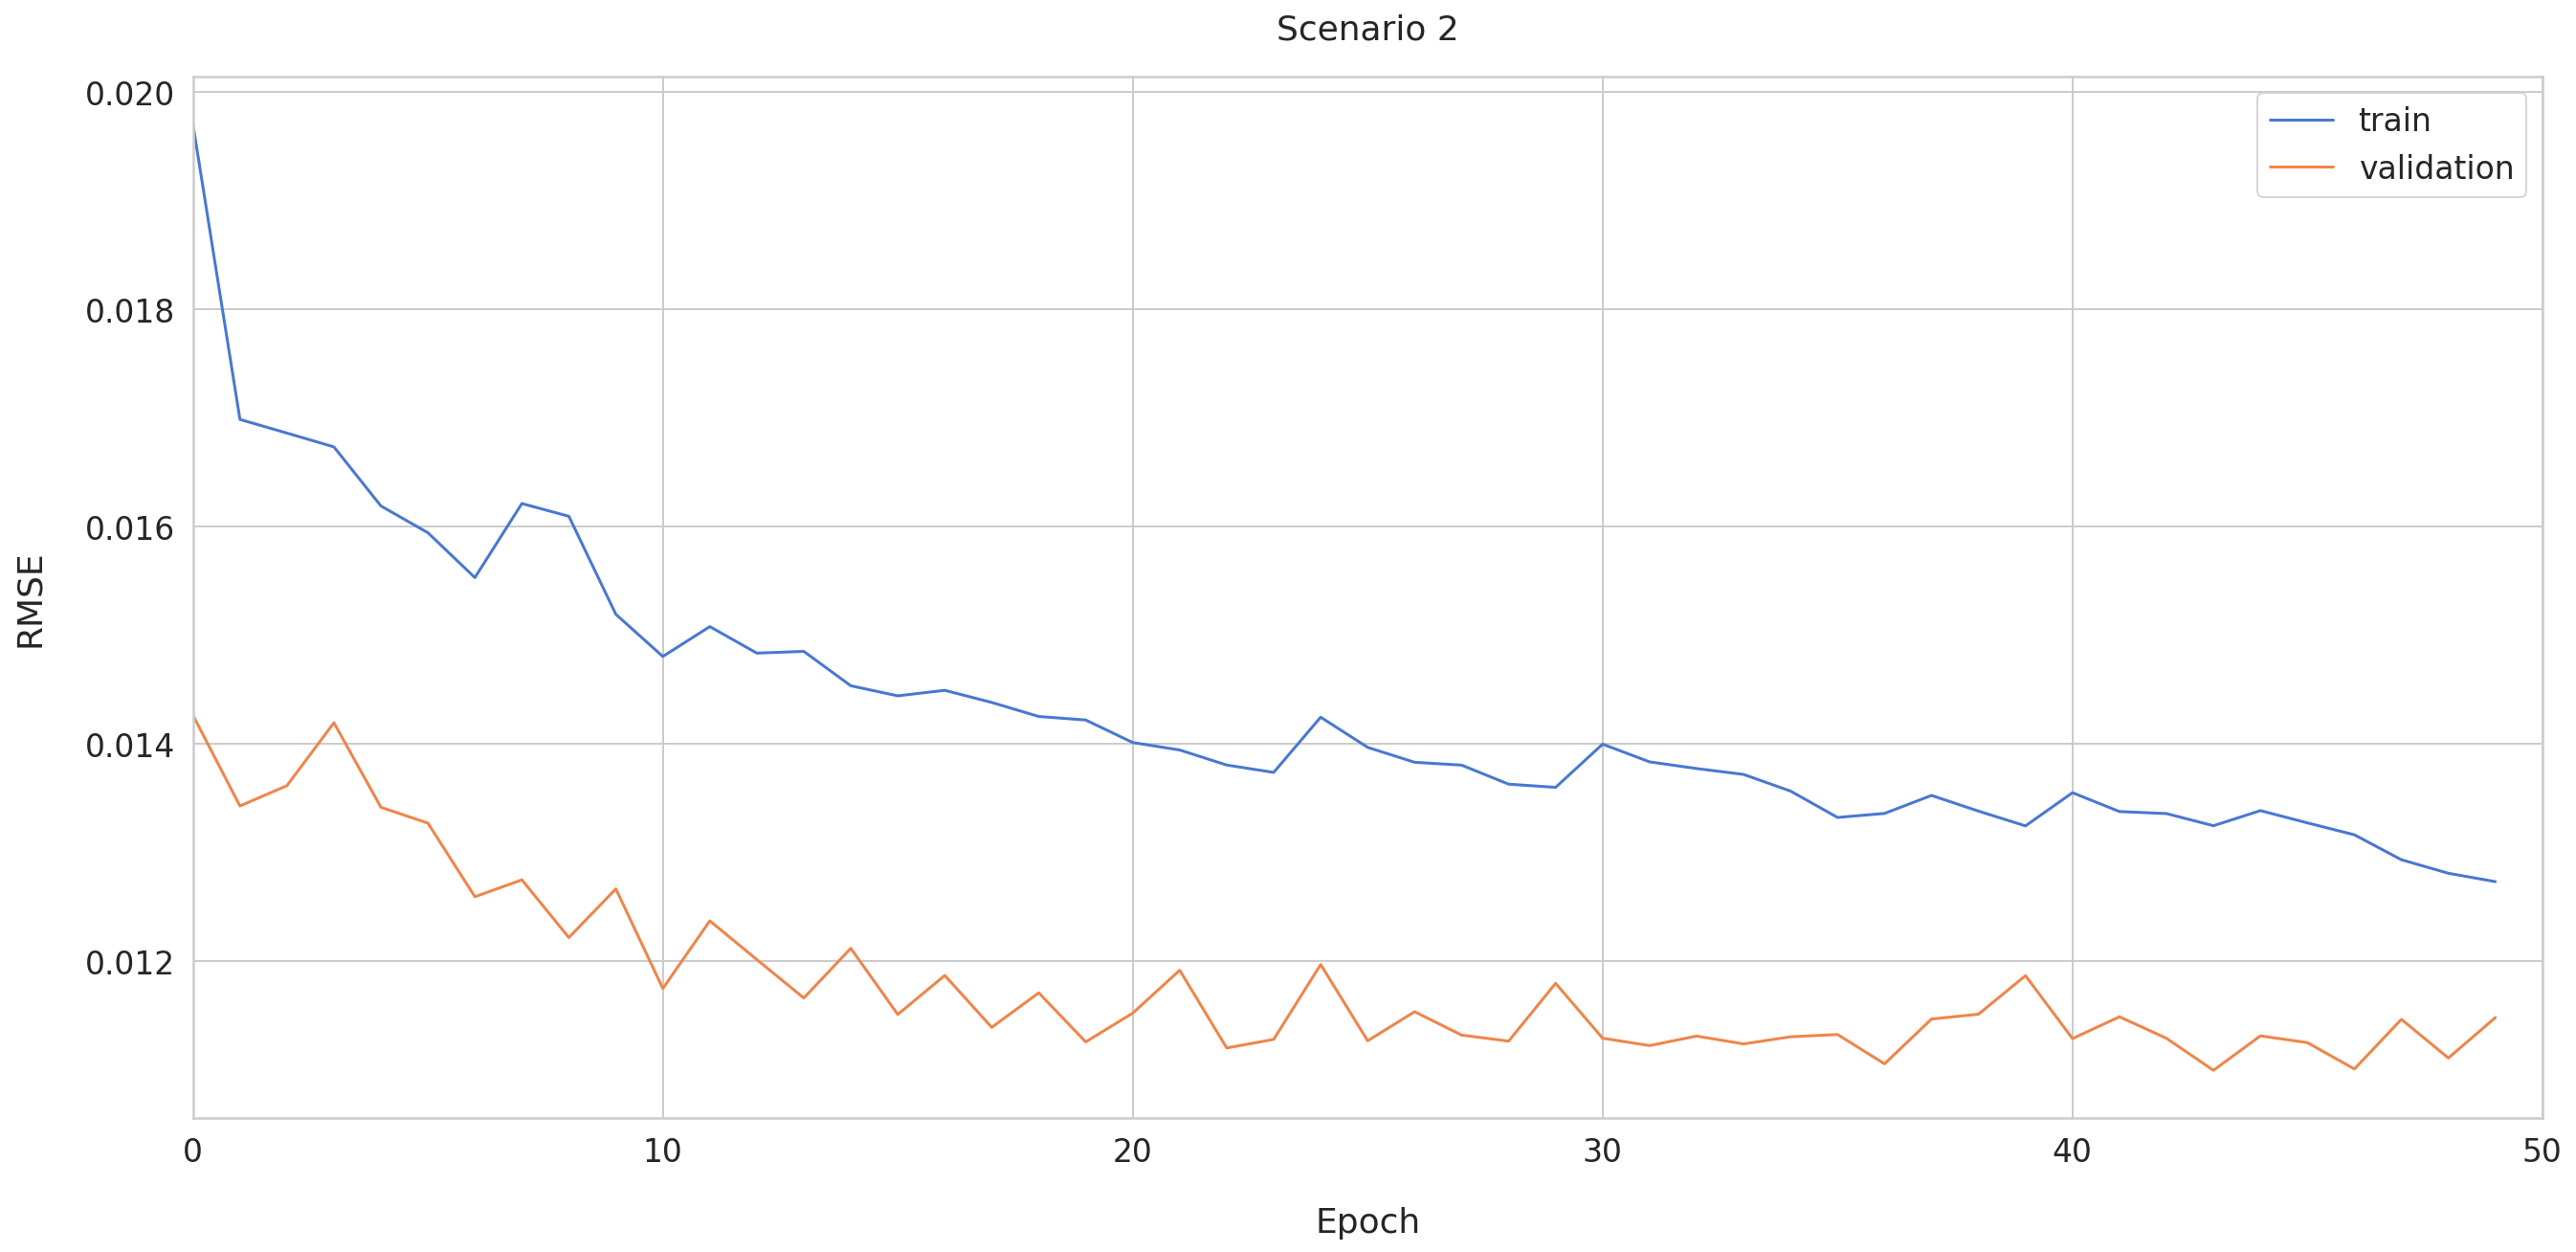

<Figure size 1584x720 with 0 Axes>

In [39]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.xlim(0,50)
plt.title('Scenario 2')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./Graphs/Models/Model 2.jpg')
plt.show()
plt.clf()

In [40]:
train_loss['Model 2'] = history2.history['loss']
train_loss.head(2)

,Epochs,Model 1,Model 2
0,1,0.019730,0.019703
1,2,0.017369,0.016985


In [41]:
val_loss['Model 2'] = history2.history['val_loss']
val_loss.head(2)

,Epochs,Model 1,Model 2
0,1,0.014320,0.014261
1,2,0.013591,0.013426


In [42]:
model2.save("./Model/Model 2.h5")

## Model 3 (80, 20 Split - 512 x 256 Neurons)

In [43]:
model3, history3 = create_model(X_train[:,:,:251].reshape(7647,14,251),
                                y_train[:,:251].reshape(7647,251),
                                512, 256, 0.2)

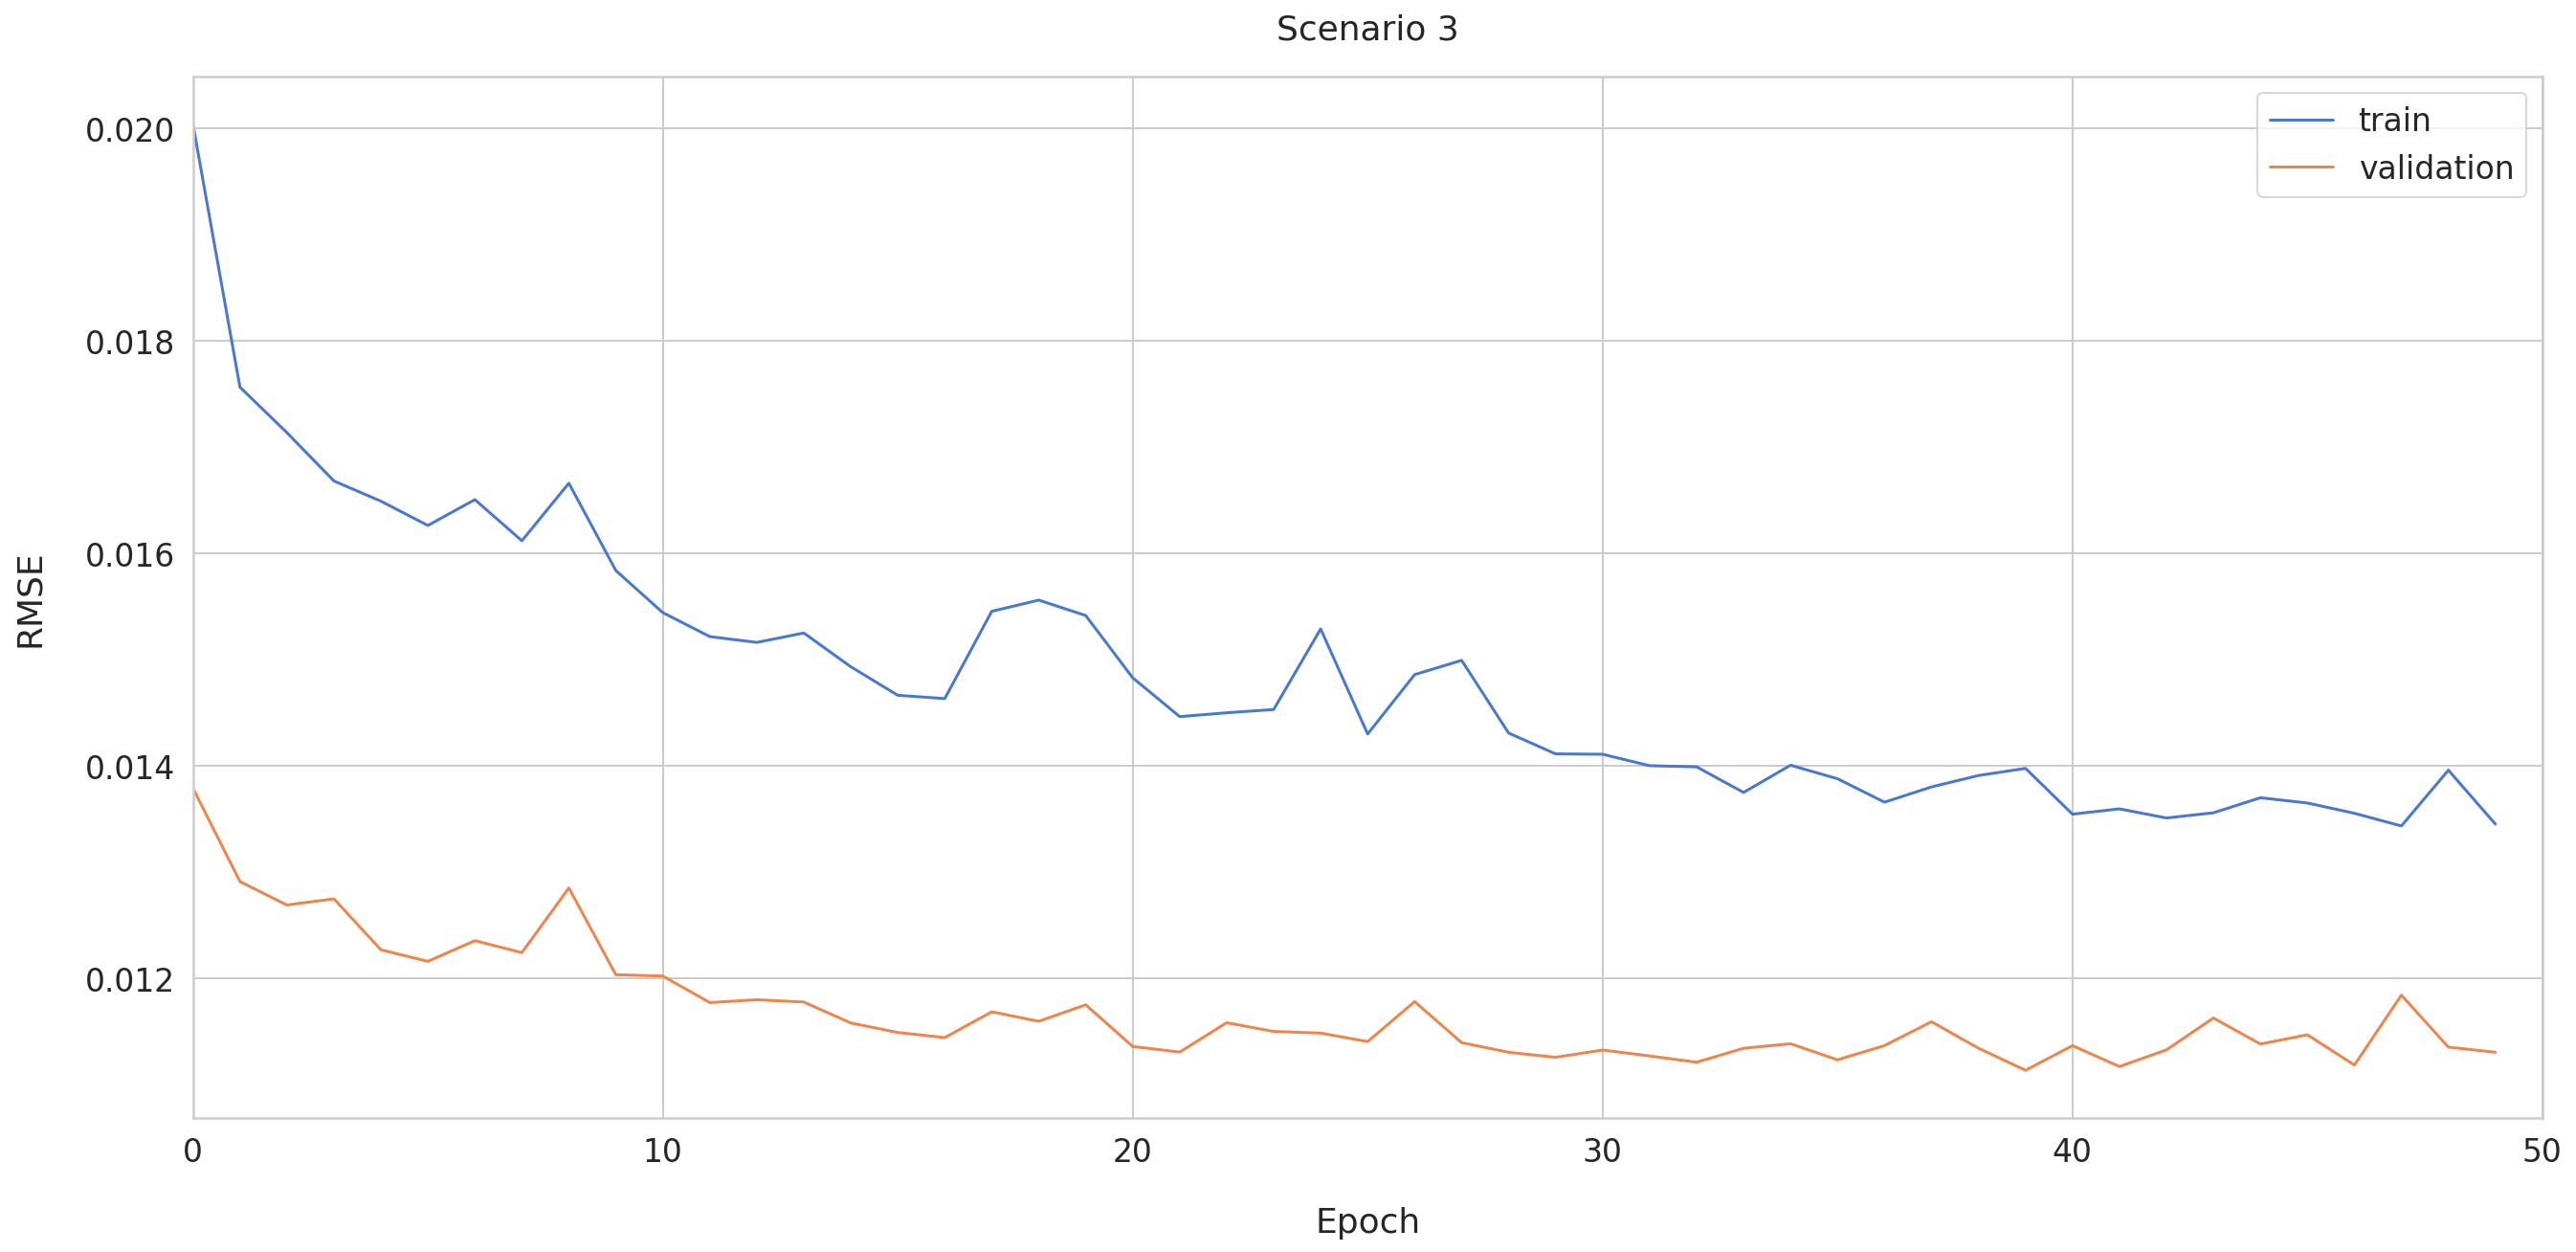

<Figure size 1584x720 with 0 Axes>

In [44]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='validation')
plt.xlim(0,50)
plt.title('Scenario 3')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./Graphs/Models/Model 3.jpg')
plt.show()
plt.clf()

In [45]:
train_loss['Model 3'] = history3.history['loss']
train_loss.head(2)

,Epochs,Model 1,Model 2,Model 3
0,1,0.019730,0.019703,0.020034
1,2,0.017369,0.016985,0.017562


In [46]:
val_loss['Model 3'] = history3.history['val_loss']
val_loss.head(2)

,Epochs,Model 1,Model 2,Model 3
0,1,0.014320,0.014261,0.013791
1,2,0.013591,0.013426,0.012913


In [47]:
model3.save("./Model/Model 3.h5")

## Model 4 (80, 20 Split - 512 x 512 Neurons)

In [49]:
model4, history4 = create_model(X_train[:,:,:251].reshape(7647,14,251),
                                y_train[:,:251].reshape(7647,251),
                                512, 512, 0.2)

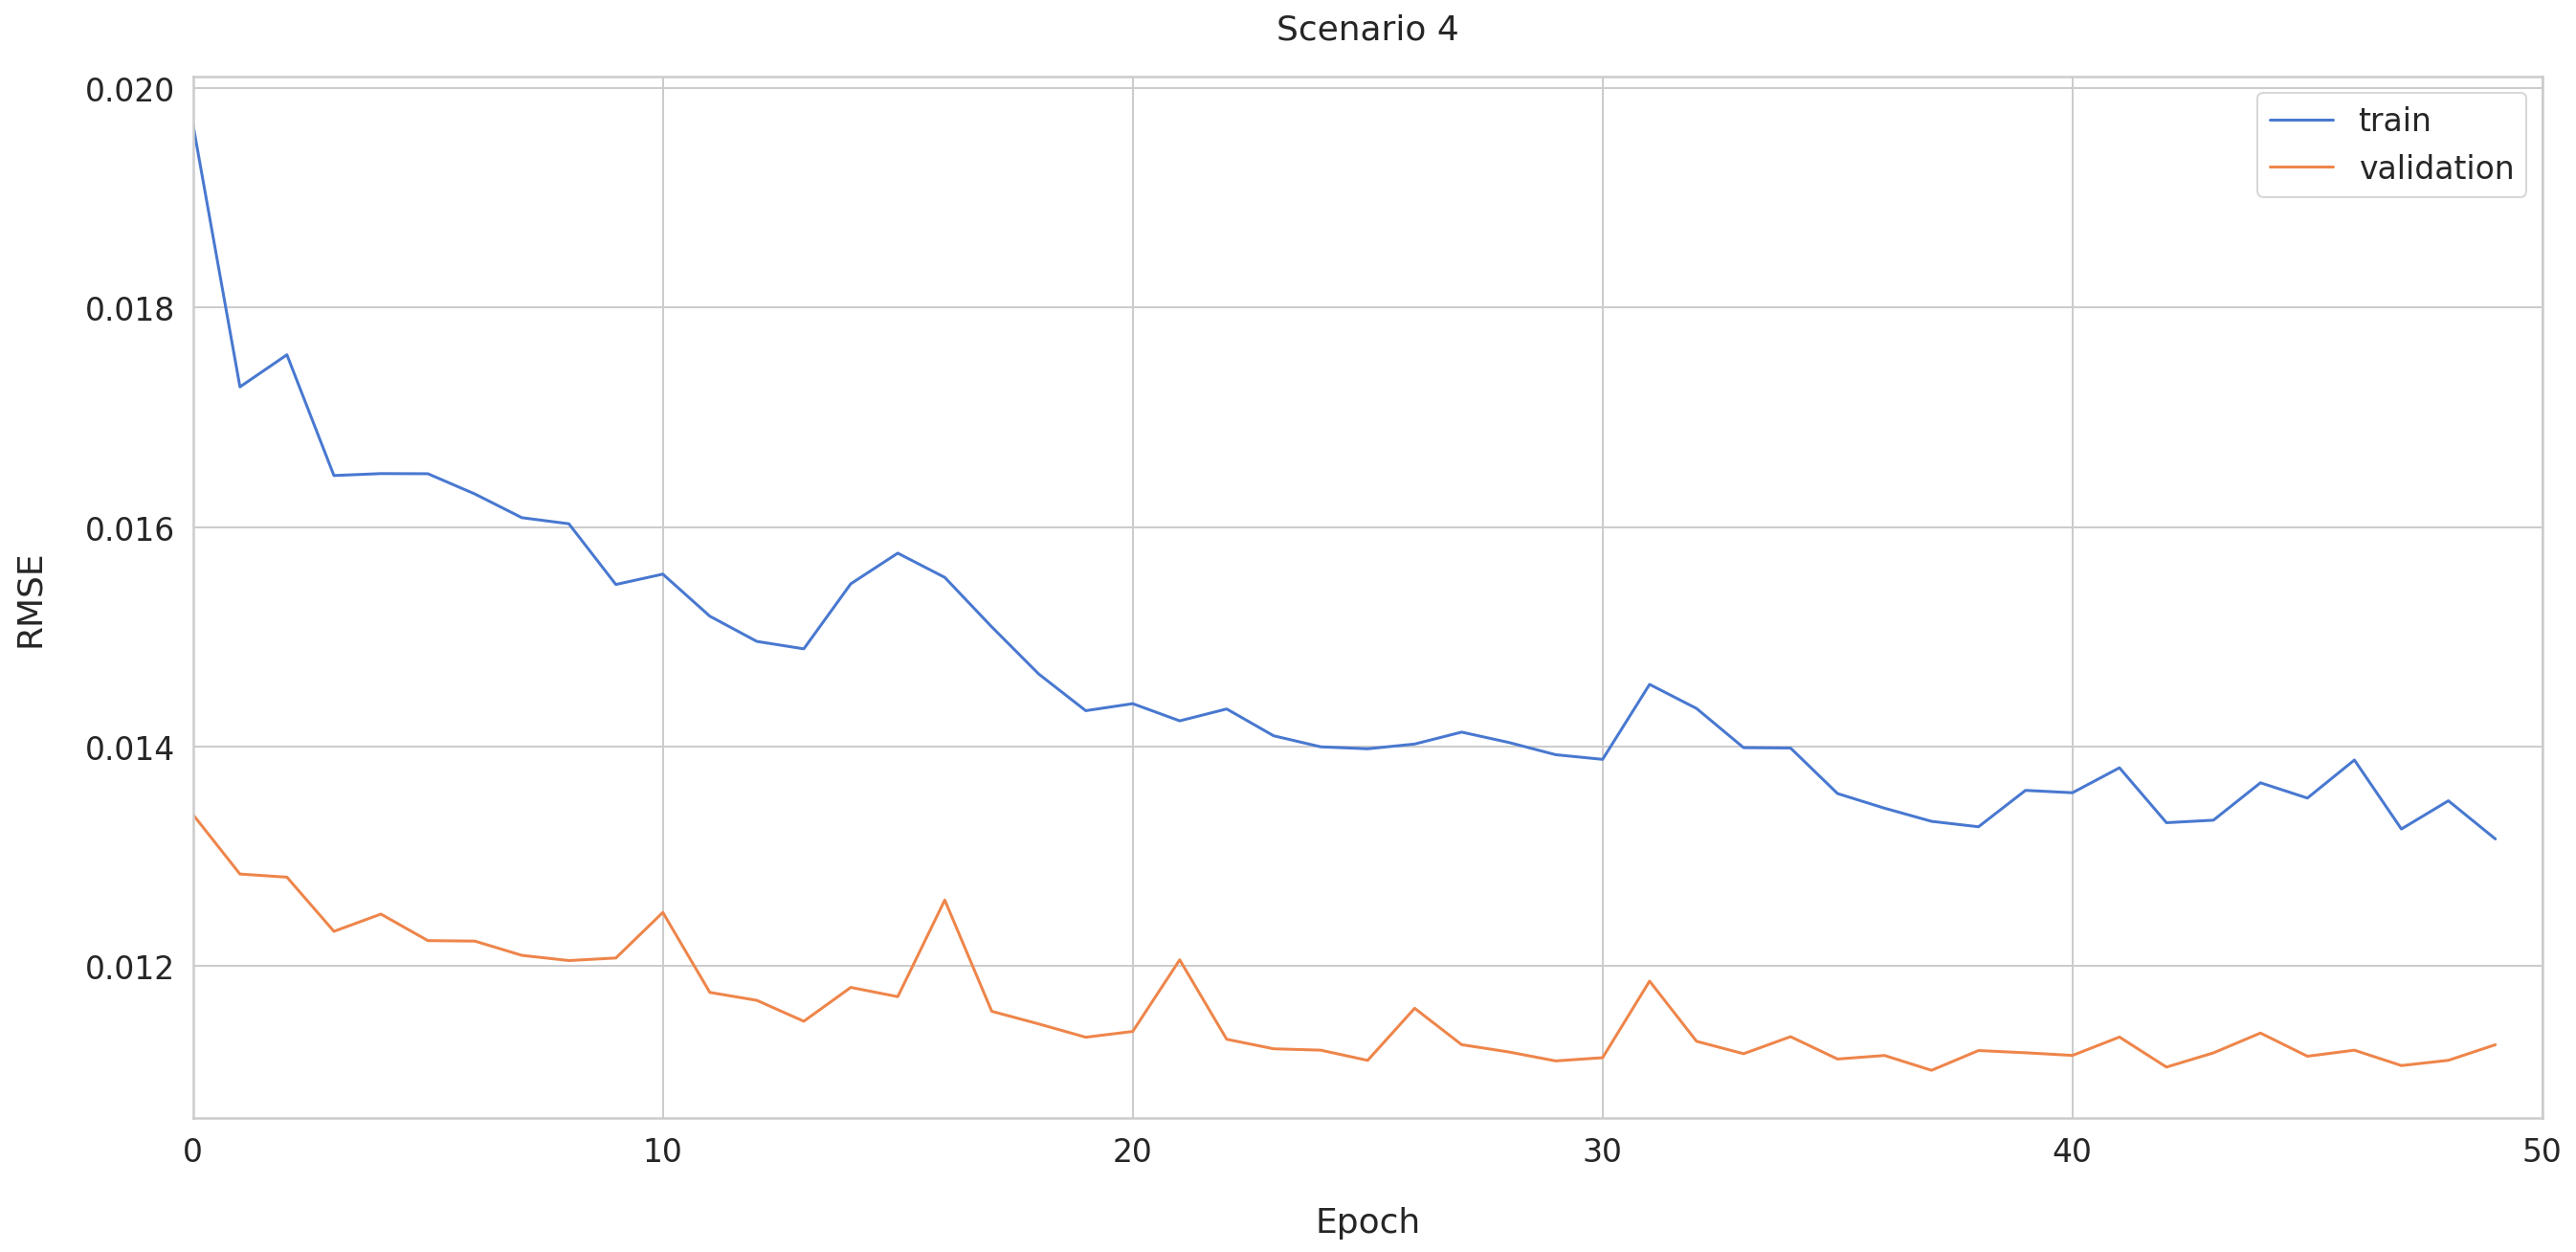

<Figure size 1584x720 with 0 Axes>

In [50]:
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='validation')
plt.xlim(0,50)
plt.title('Scenario 4')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./Graphs/Models/Model 4.jpg')
plt.show()
plt.clf()

In [51]:
train_loss['Model 4'] = history4.history['loss']
train_loss.head(2)

,Epochs,Model 1,Model 2,Model 3,Model 4
0,1,0.019730,0.019703,0.020034,0.019672
1,2,0.017369,0.016985,0.017562,0.017278


In [52]:
val_loss['Model 4'] = history4.history['val_loss']
val_loss.head(2)

,Epochs,Model 1,Model 2,Model 3,Model 4
0,1,0.014320,0.014261,0.013791,0.013378
1,2,0.013591,0.013426,0.012913,0.012836


In [53]:
model4.save("./Model/Model 4.h5")

## Model 5 (70, 30 Split - 512 x 256 Neurons)

In [54]:
model5, history5 = create_model(X_train[:,:,:251].reshape(7647,14,251),
                                y_train[:,:251].reshape(7647,251),
                                512, 256, 0.3)

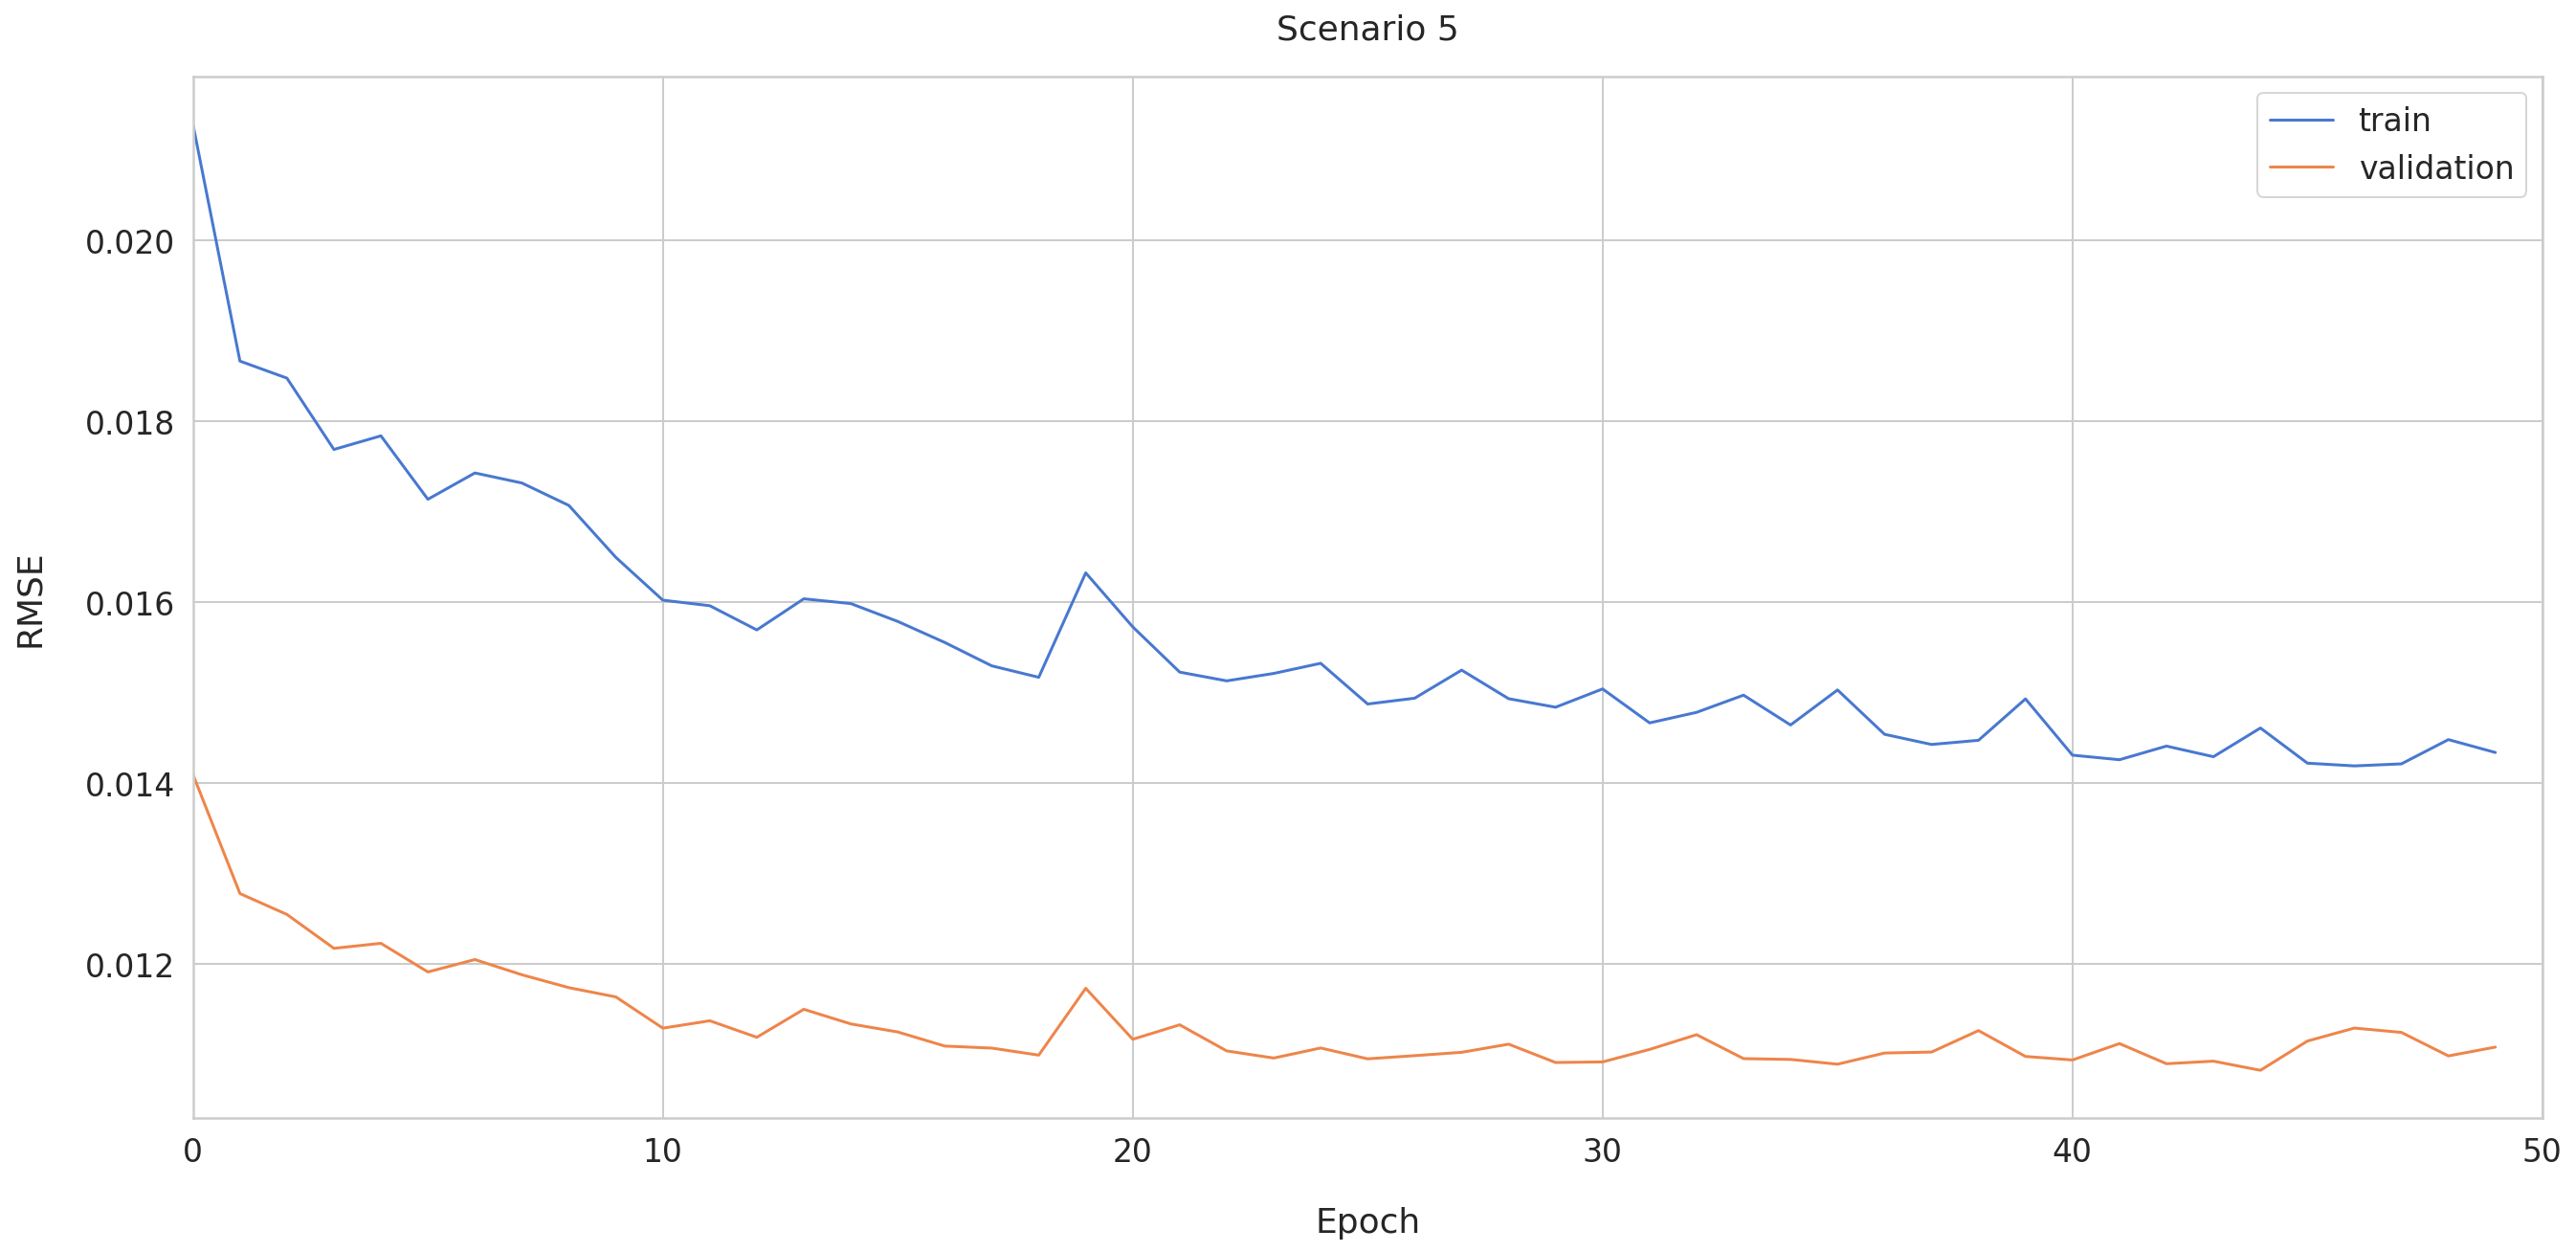

<Figure size 1584x720 with 0 Axes>

In [55]:
plt.plot(history5.history['loss'], label='train')
plt.plot(history5.history['val_loss'], label='validation')
plt.xlim(0,50)
plt.title('Scenario 5')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./Graphs/Models/Model 5.jpg')
plt.show()
plt.clf()

In [56]:
train_loss['Model 5'] = history5.history['loss']
train_loss.head(2)

,Epochs,Model 1,Model 2,Model 3,Model 4,Model 5
0,1,0.019730,0.019703,0.020034,0.019672,0.021285
1,2,0.017369,0.016985,0.017562,0.017278,0.018665


In [57]:
val_loss['Model 5'] = history5.history['val_loss']
val_loss.head(2)

,Epochs,Model 1,Model 2,Model 3,Model 4,Model 5
0,1,0.014320,0.014261,0.013791,0.013378,0.014093
1,2,0.013591,0.013426,0.012913,0.012836,0.012775


In [58]:
model5.save("./Model/Model 5.h5")

## Model 6 (70, 30 Split - 512 x 512 Neurons)

In [59]:
model6, history6 = create_model(X_train[:,:,:251].reshape(7647,14,251),
                                y_train[:,:251].reshape(7647,251),
                                512, 512, 0.3)

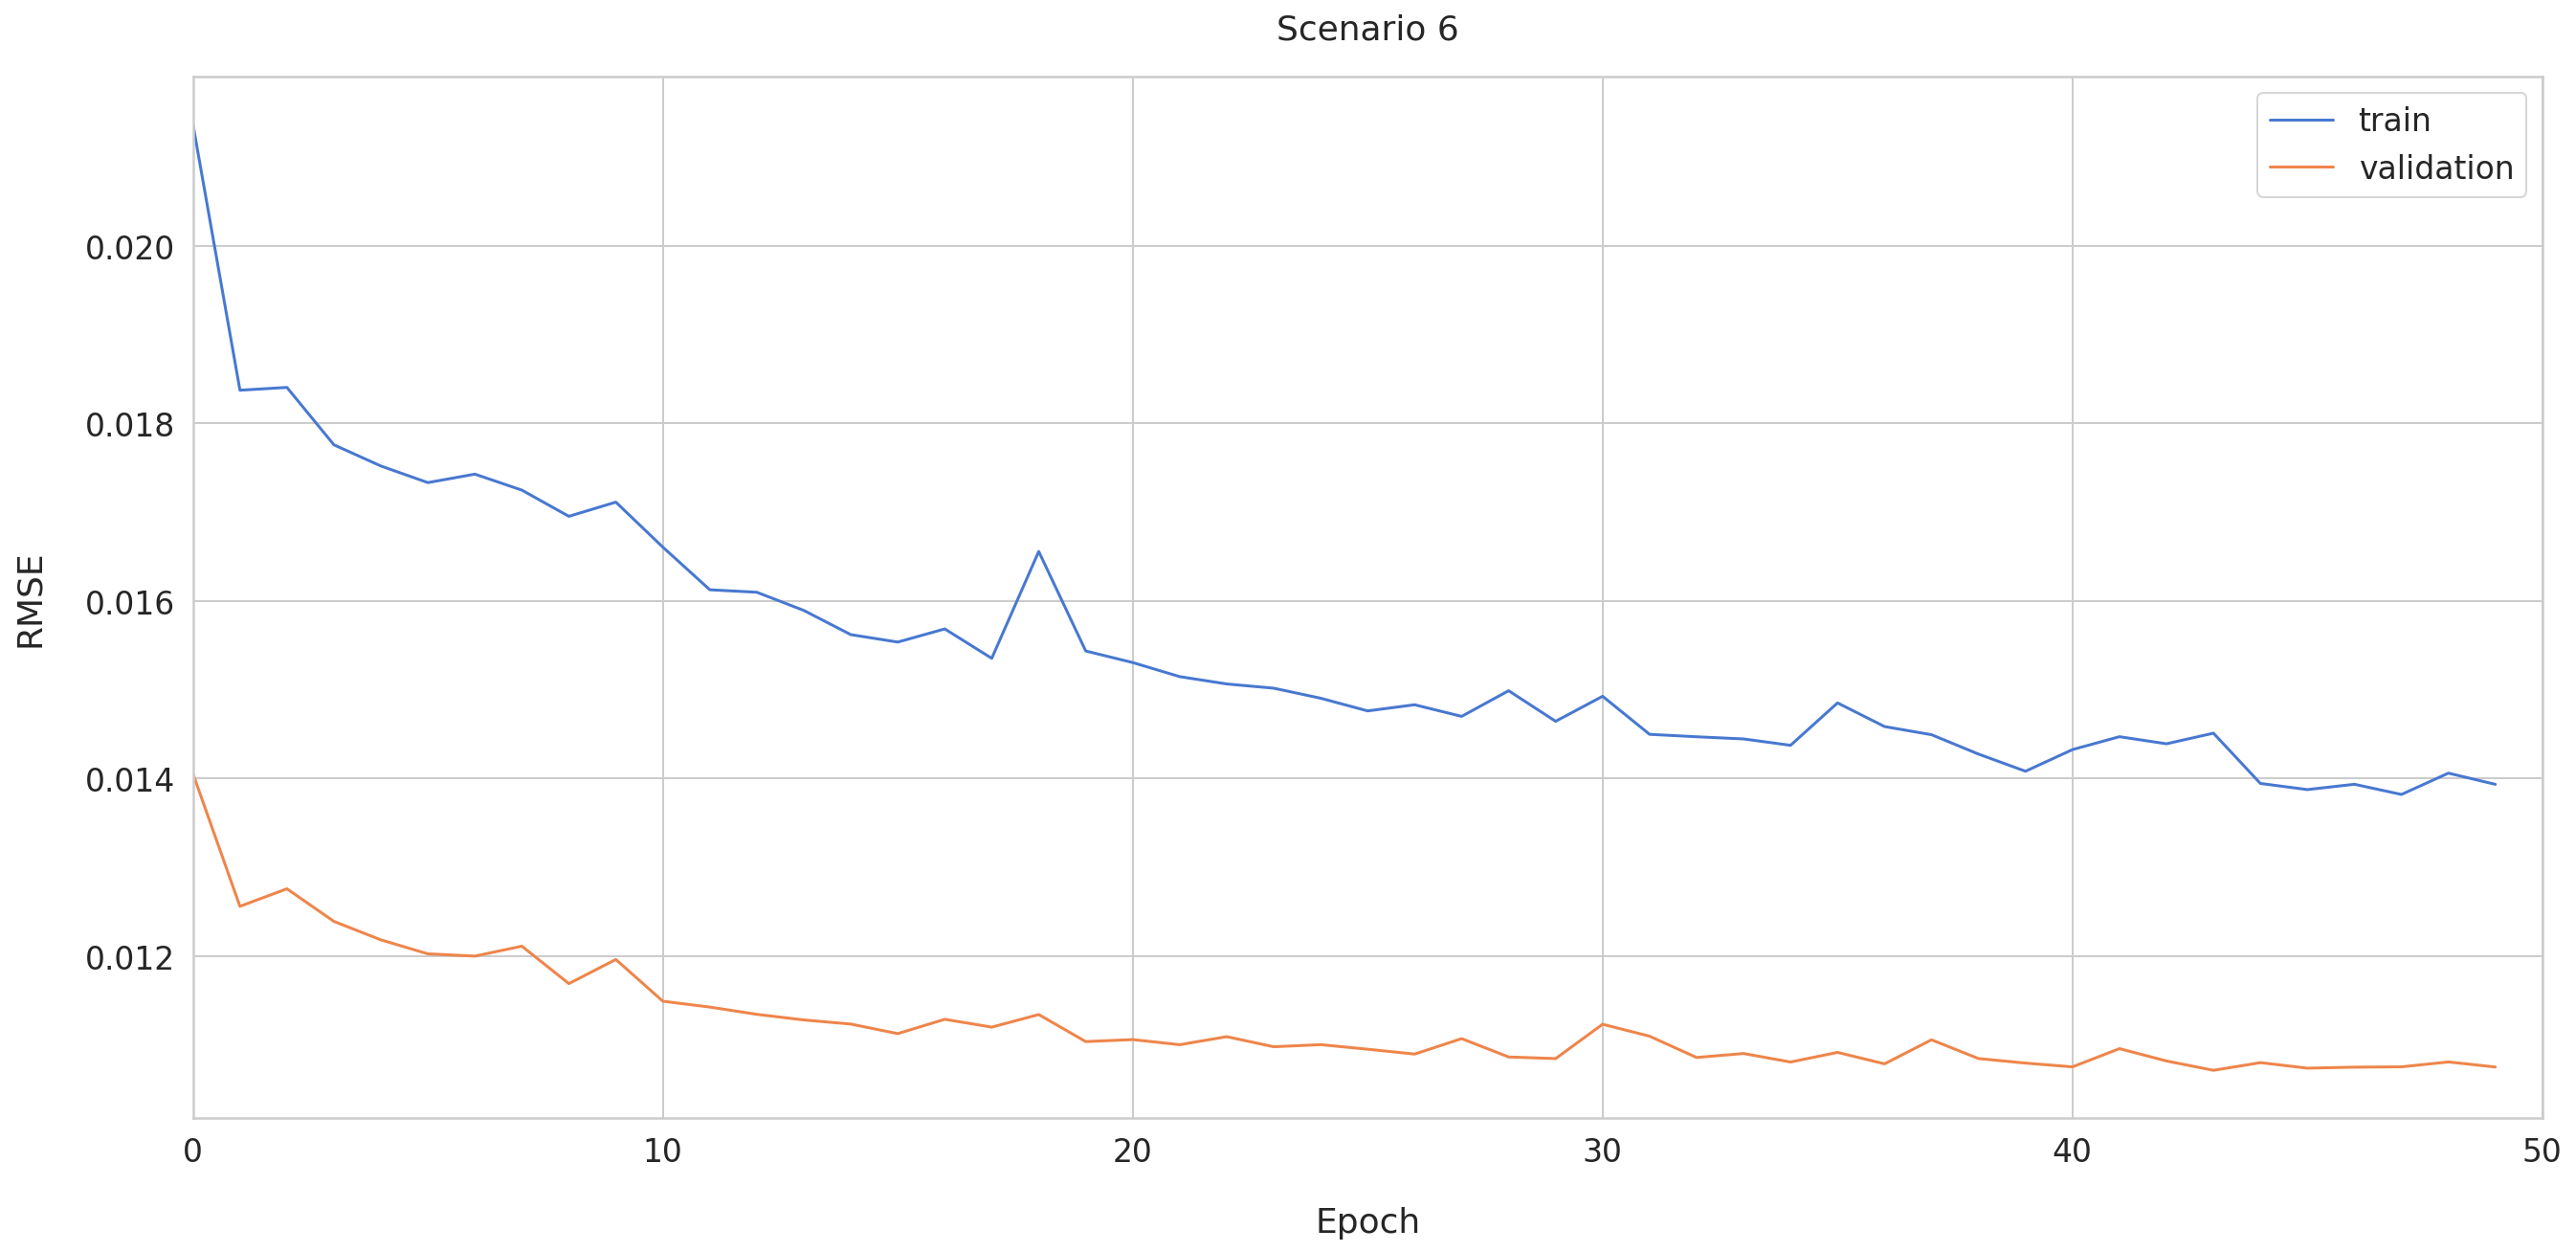

<Figure size 1584x720 with 0 Axes>

In [60]:
plt.plot(history6.history['loss'], label='train')
plt.plot(history6.history['val_loss'], label='validation')
plt.xlim(0,50)
plt.title('Scenario 6')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./Graphs/Models/Model 6.jpg')
plt.show()
plt.clf()

In [61]:
train_loss['Model 6'] = history6.history['loss']
train_loss.head(2)

,Epochs,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
0,1,0.019730,0.019703,0.020034,0.019672,0.021285,0.021368
1,2,0.017369,0.016985,0.017562,0.017278,0.018665,0.018373


In [62]:
val_loss['Model 6'] = history6.history['val_loss']
val_loss.head(2)

,Epochs,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
0,1,0.014320,0.014261,0.013791,0.013378,0.014093,0.014056
1,2,0.013591,0.013426,0.012913,0.012836,0.012775,0.012563


In [63]:
model6.save("./Model/Model 6.h5")

# Visualizing All Model Loss

## Training

In [64]:
train_loss.to_csv('./Training Loss.csv')
val_loss.to_csv('./Validation Loss.csv')

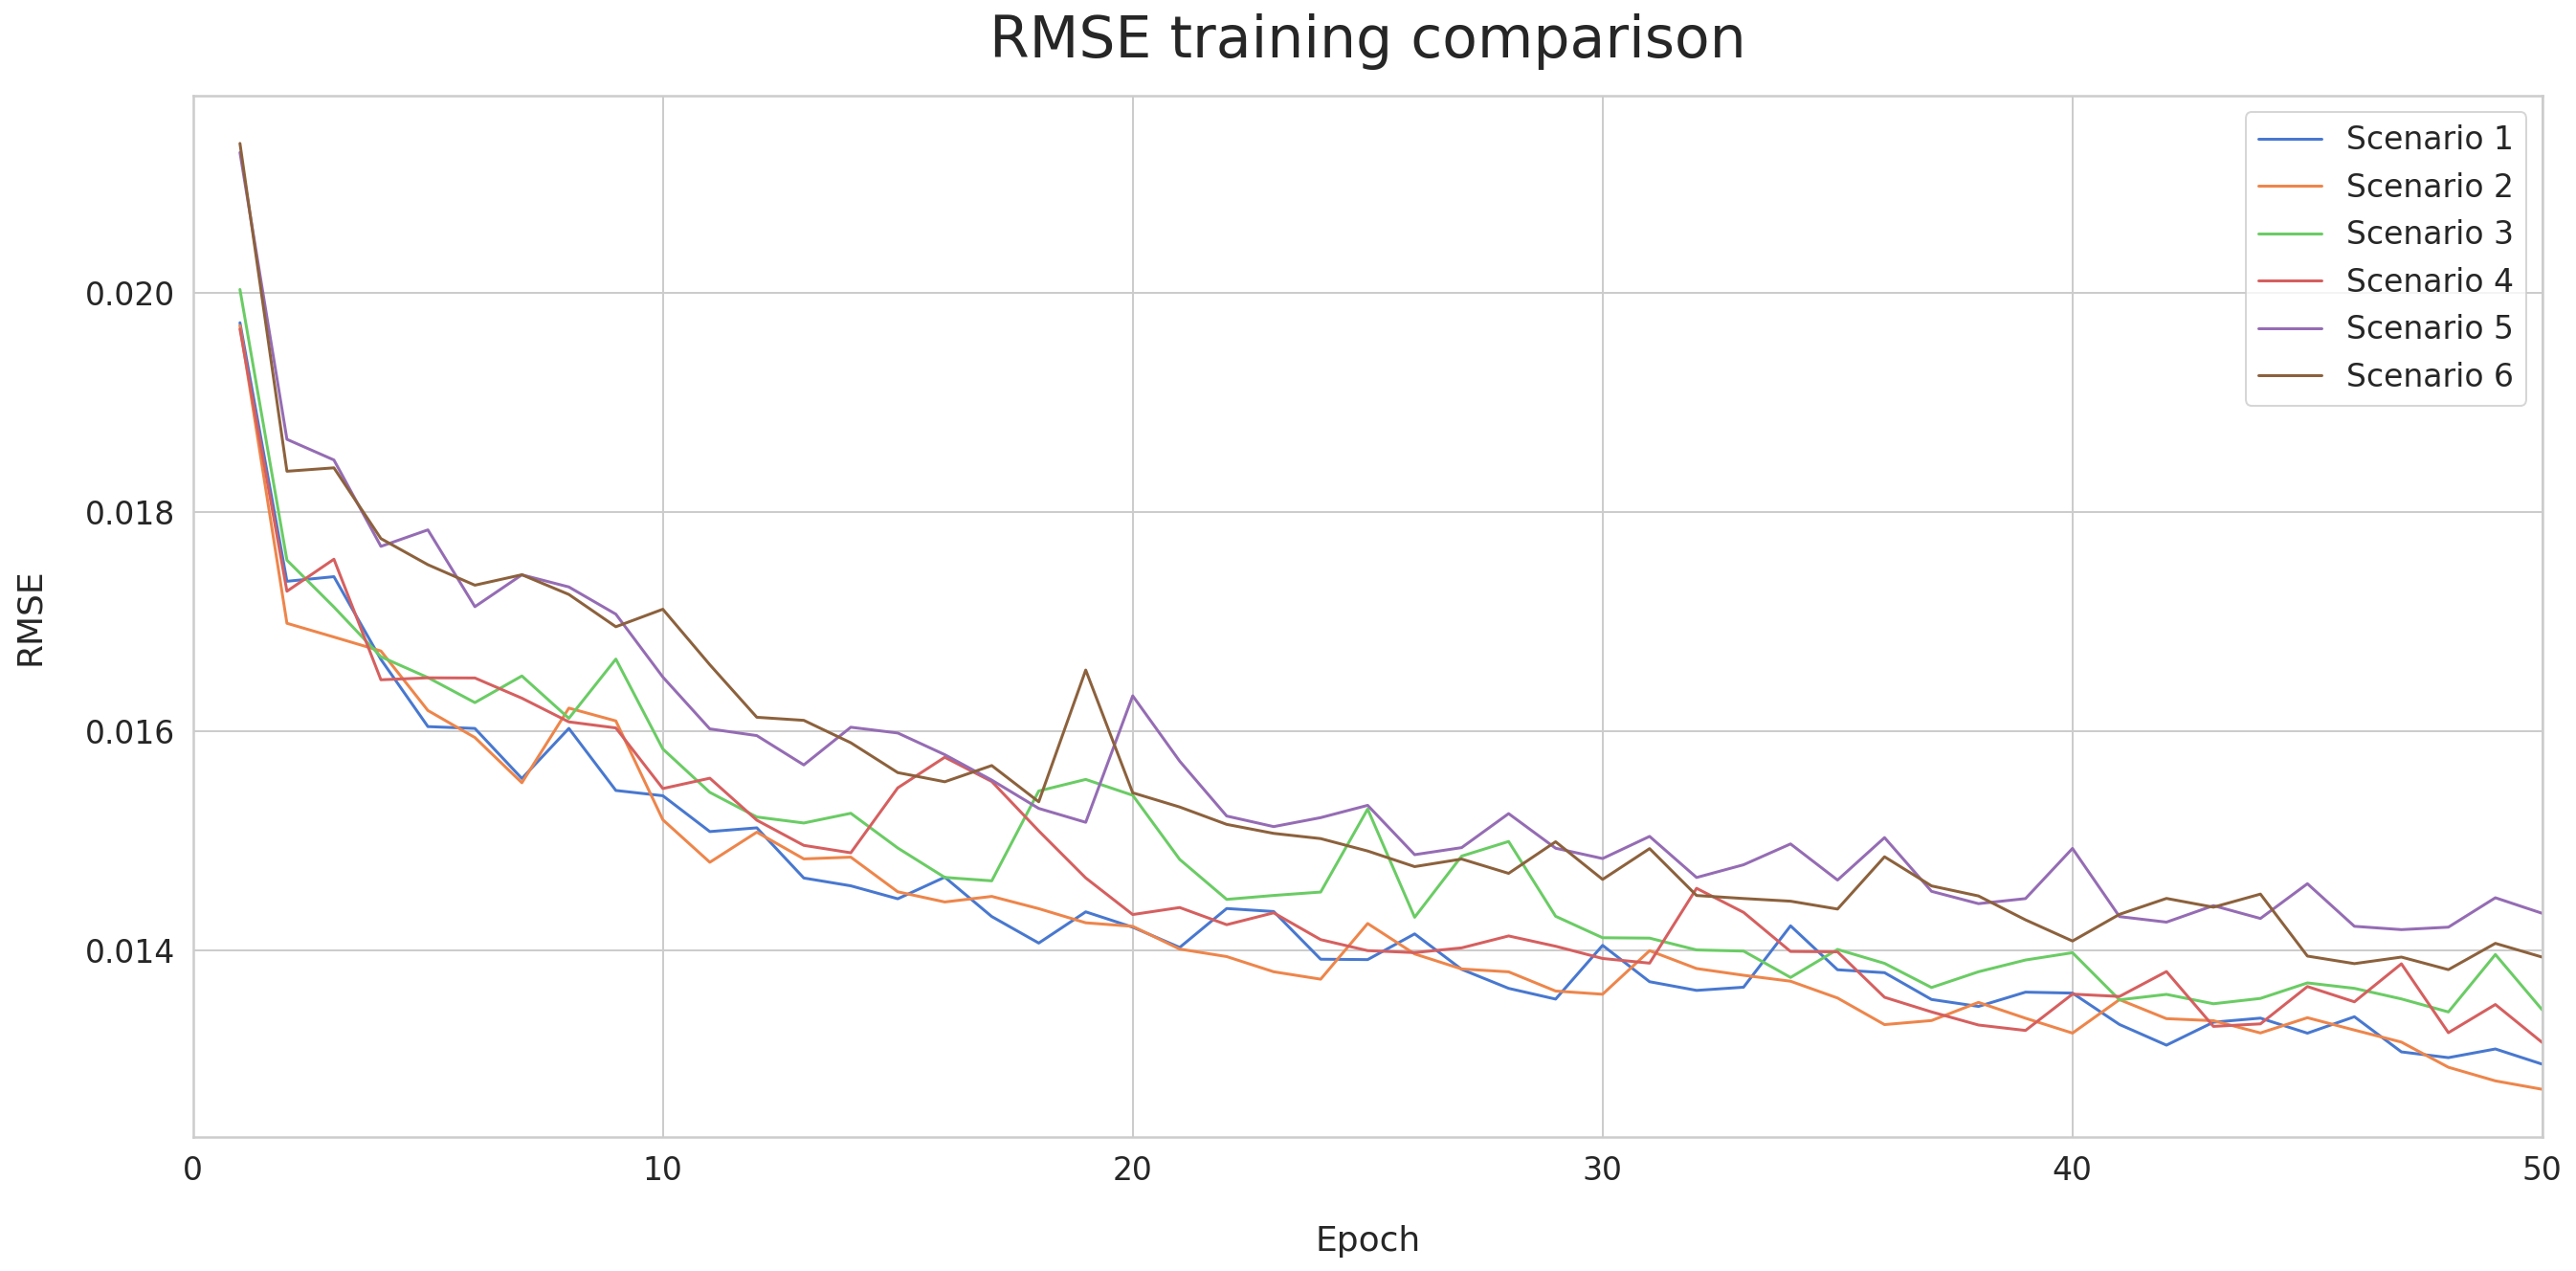

<Figure size 1584x720 with 0 Axes>

In [65]:
sns.lineplot(x=train_loss['Epochs'], y=train_loss['Model 1'], label='Scenario 1')
sns.lineplot(x=train_loss['Epochs'], y=train_loss['Model 2'], label='Scenario 2')
sns.lineplot(x=train_loss['Epochs'], y=train_loss['Model 3'], label='Scenario 3')
sns.lineplot(x=train_loss['Epochs'], y=train_loss['Model 4'], label='Scenario 4')
sns.lineplot(x=train_loss['Epochs'], y=train_loss['Model 5'], label='Scenario 5')
sns.lineplot(x=train_loss['Epochs'], y=train_loss['Model 6'], label='Scenario 6')
plt.xlim(0,50)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('RMSE training comparison',fontsize=30)
plt.legend()
plt.savefig('./Graphs/Models/Training comparison.jpg')
plt.show()
plt.clf()

## Validation

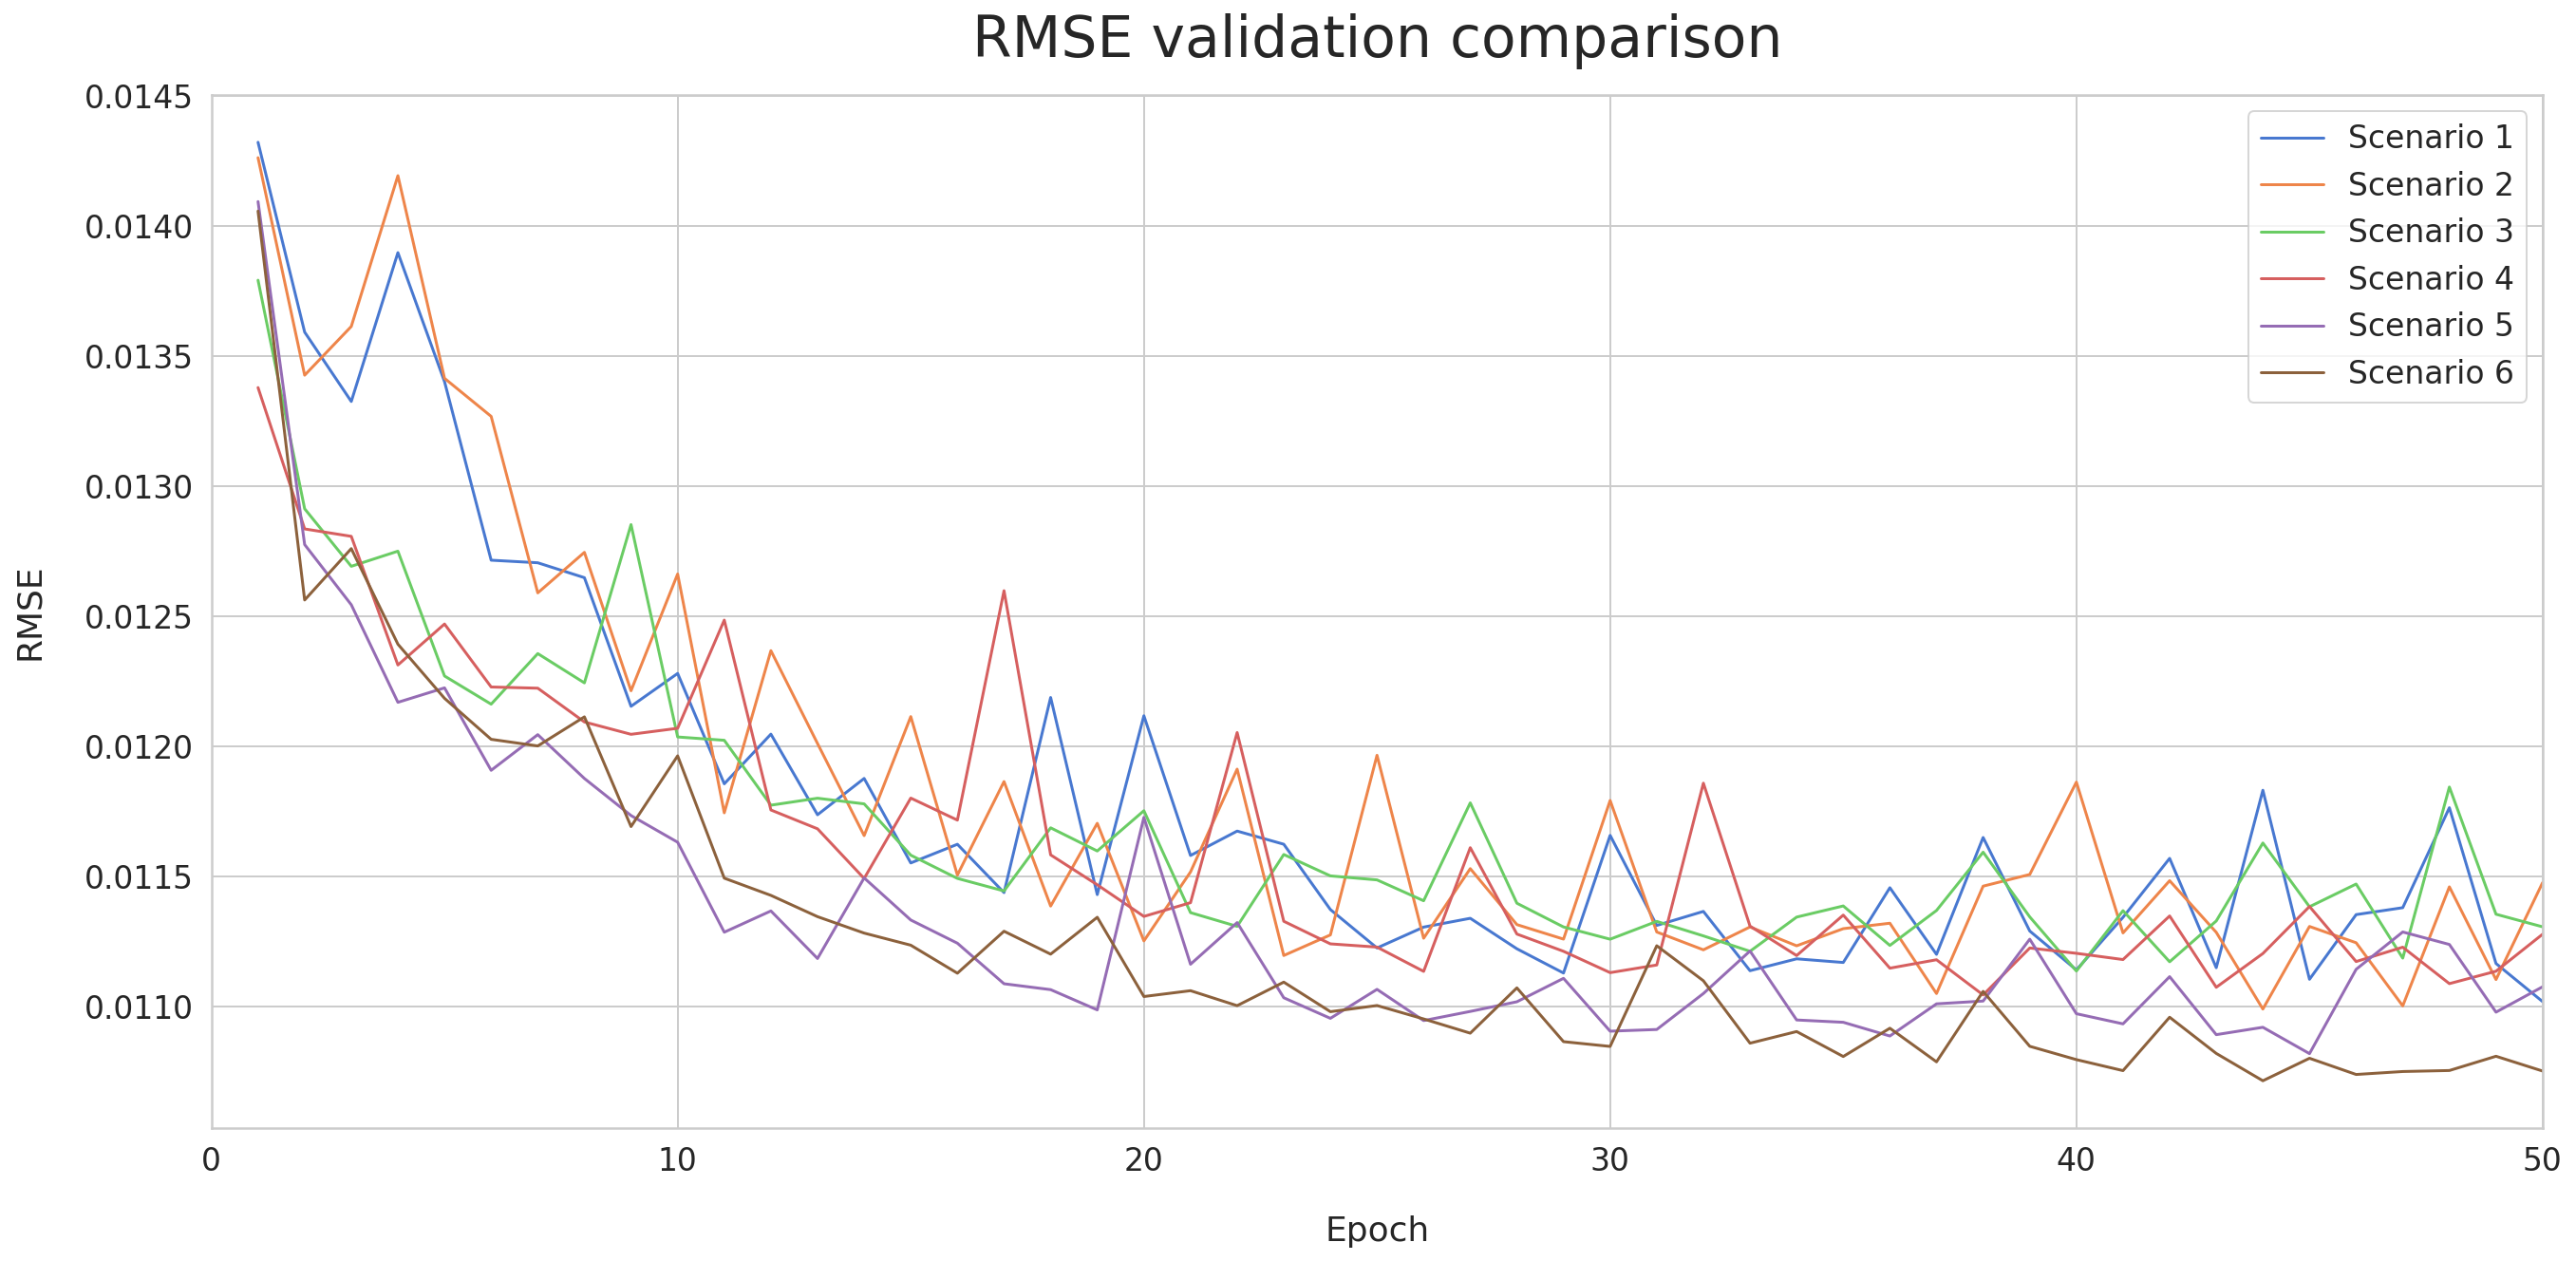

<Figure size 1584x720 with 0 Axes>

In [66]:
sns.lineplot(x=val_loss['Epochs'], y=val_loss['Model 1'], label='Scenario 1')
sns.lineplot(x=val_loss['Epochs'], y=val_loss['Model 2'], label='Scenario 2')
sns.lineplot(x=val_loss['Epochs'], y=val_loss['Model 3'], label='Scenario 3')
sns.lineplot(x=val_loss['Epochs'], y=val_loss['Model 4'], label='Scenario 4')
sns.lineplot(x=val_loss['Epochs'], y=val_loss['Model 5'], label='Scenario 5')
sns.lineplot(x=val_loss['Epochs'], y=val_loss['Model 6'], label='Scenario 6')
plt.xlim(0,50)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('RMSE validation comparison',fontsize=30)
plt.legend()
plt.savefig('./Graphs/Models/Validation comparison.jpg')
plt.show()
plt.clf()

## Comparison Table

In [68]:
rsme_train = []
for i in range(1,7):
  x = train_loss.iloc[-1]['Model {}'.format(i)]
  rsme_train.append(x)

rsme_val = []
for i in range(1,7):
  x = val_loss.iloc[-1]['Model {}'.format(i)]
  rsme_val.append(x)

In [69]:
comparison_df = pd.DataFrame({
    'Scenario':[1,2,3,4,5,6],
    'Training RMSE':rsme_train,
    'Validation RMSE':rsme_val,
})
comparison_df

,Scenario,Training RMSE,Validation RMSE
0,1,0.012958,0.011020
1,2,0.012729,0.011477
2,3,0.013453,0.011307
3,4,0.013155,0.011279
4,5,0.014336,0.011077
5,6,0.013936,0.010754


The lowest validation RMSE is in 6th scenario, thus we will use models based on the 6th scenario as our main model

#All

In [ ]:
model = tf.keras.models.load_model(filepath='./Model/Model 6.h5',compile=False)

In [ ]:
df_forecast = pd.DataFrame({'Date':dates_test})
df_true = pd.DataFrame({'Date':dates_test})

In [ ]:
y_pred = model.predict(X_test[:,:,:251].reshape(731,14,251))

for j in range(0,251):
  col = str(j+1)
  df_forecast[col] = abs(y_pred[:,j]) * (max_chl - min_chl) + min_chl

df_forecast.to_csv('./Predicted Chlorophyll-a.csv',index=False)

In [ ]:
for i in range(0,41164):
  col = str(i+1)
  df_true[col] = abs(y_test[:,i]) * (max_chl - min_chl) + min_chl

df_true.to_csv('./Actual Chlorophyll-a.csv',index=False)

In [ ]:
del y_pred

We had already predicted our first 251 pixel from 41.164 pixel so now we can do for loop to create model for the next 251 pixel and predicted it and so on

In [ ]:
m = 251
n = 502

for i in range(0,163):

  X_train, y_train = create_dataset(train_scaled[:,m:n], train_scaled[:,m:n], 14)
  X_test, y_test = create_dataset(test_scaled[:,m:n], test_scaled[:,m:n], 14)

  model7, history7 = create_model(X_train[:,:,:251].reshape(7647,14,251),
                                  y_train[:,:251].reshape(7647,251),
                                  512, 512, 0.3)
  
  y_pred = model7.predict(X_test)

  k=0
  for j in range(m+1,n+1):
    col = str(j)
    df_forecast[col] = abs(y_pred[:,k]) * (max_chl - min_chl) + min_chl
    k += 1

  df_forecast.to_csv('./Predicted Chlorophyll-a.csv',index=False)

  print(i,'= ',m,':',n)
  m += 251
  n += 251
  del model7, history7, y_pred, X_train, y_train, X_test, y_test